In [1]:
import pandas as pd
import numpy as np

In [2]:
df=  pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [4]:
chisqt = pd.crosstab(df['City'], df['Branch'], margins=True)
print(chisqt)

Branch       A    B    C   All
City                          
Mandalay     0  332    0   332
Naypyitaw    0    0  328   328
Yangon     340    0    0   340
All        340  332  328  1000


In [5]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values,
                  chisqt.iloc[2][0:5].values])
print(chi2_contingency(value)[0:3])

(2000.0, 0.0, 6)


0.0 is the p value which suggest that there is statistical significance between feature and is alternative hypothesis which is equal to another,200 is the statistical value and 6 is the degree of freedom

In [6]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [7]:
city_Yangon = df[df['City'] == 'Yangon']   
city_Naypyitaw = df[df['City'] == 'Naypyitaw']
city_Mandalay = df[df['City'] == 'Mandalay']
print(city_Yangon.shape,city_Naypyitaw.shape,city_Mandalay.shape)

(340, 17) (328, 17) (332, 17)


In [8]:
from scipy.stats import f_oneway
alpha = 0.05
statistic , p_value = f_oneway(city_Yangon['gross income'],city_Naypyitaw['gross income'],city_Mandalay['gross income'])
print('p_value :',p_value)
if p_value > 0.05:
    print('Mean is different, null hypothesis')
else:
    print('Mean is same, reject null hypothesis')

p_value : 0.413210174367147
Mean is different, null hypothesis


In [9]:
member_customer = df[df['Customer type'] == 'Member']   
normal_customer = df[df['Customer type'] == 'Normal']
print(member_customer.shape,normal_customer.shape)

(501, 17) (499, 17)


In [10]:
from scipy import stats
alpha = 0.05
statistic , p_value = stats.ttest_ind(member_customer['gross income'],normal_customer['gross income'])
print('p_value :',p_value)
if p_value > 0.05:
    print('No variance in means ,i.e means are equal accept null hypothesis')
else:
    print('Variance in means ,i.e means are not equal reject null hypothesis')

p_value : 0.5343949596143603
No variance in means ,i.e means are equal accept null hypothesis


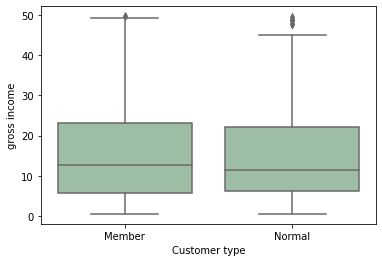

In [18]:
import  seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x='Customer type', y='gross income', data=df, color='#99c2a2')
plt.show()

/home/kumar/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kumar/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


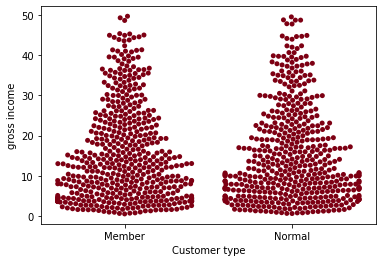

In [19]:
ax = sns.swarmplot(x="Customer type", y="gross income", data=df, color='#7d0013')
plt.show()

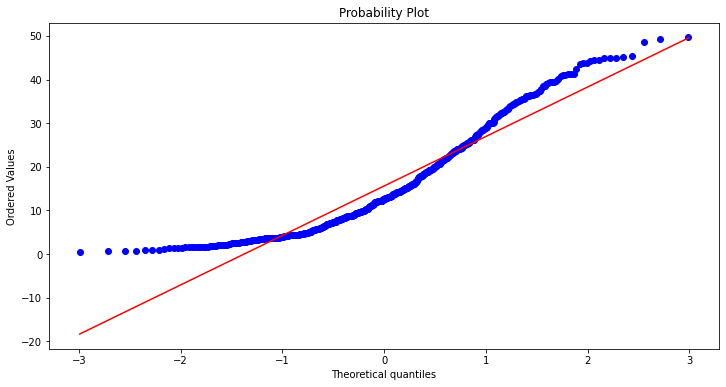

In [23]:
from scipy import stats
plt.figure(figsize=(12,6))
stats.probplot(member_customer['gross income'],plot=plt,dist='norm')
plt.show()

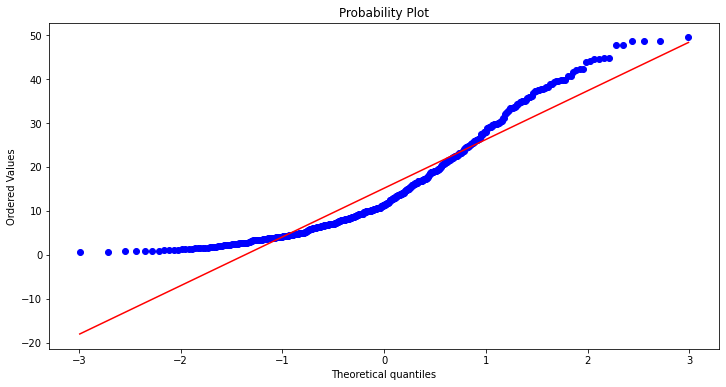

In [22]:
plt.figure(figsize=(12,6))
stats.probplot(normal_customer['gross income'],plot=plt,dist='norm')
plt.show()

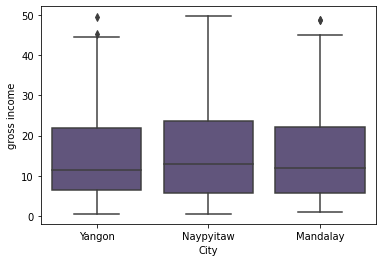

In [24]:
ax = sns.boxplot(x='City', y='gross income', data=df, color='#5e4e82')
plt.show()

/home/kumar/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kumar/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kumar/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


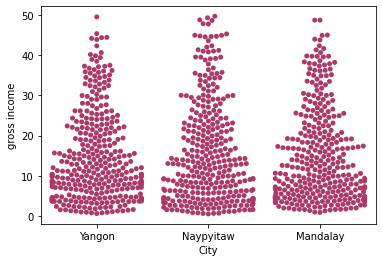

In [27]:
ax = sns.swarmplot(x="City", y="gross income", data=df, color='#ab3a6b')
plt.show()

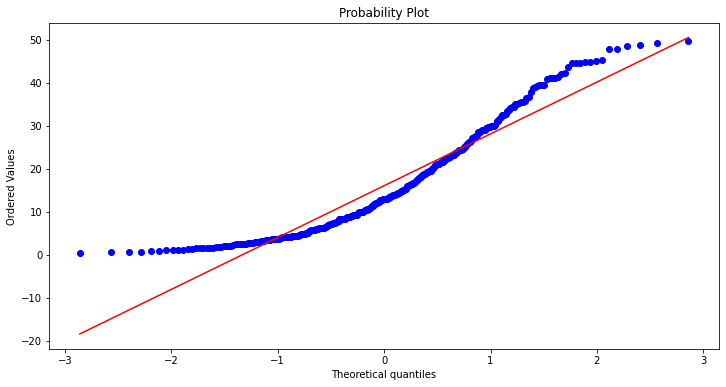

In [28]:
plt.figure(figsize=(12,6))
stats.probplot(city_Naypyitaw['gross income'],plot=plt,dist='norm')
plt.show()

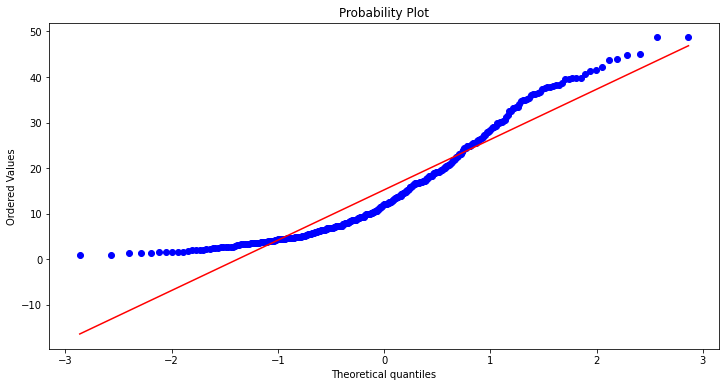

In [29]:
plt.figure(figsize=(12,6))
stats.probplot(city_Mandalay['gross income'],plot=plt,dist='norm')
plt.show()

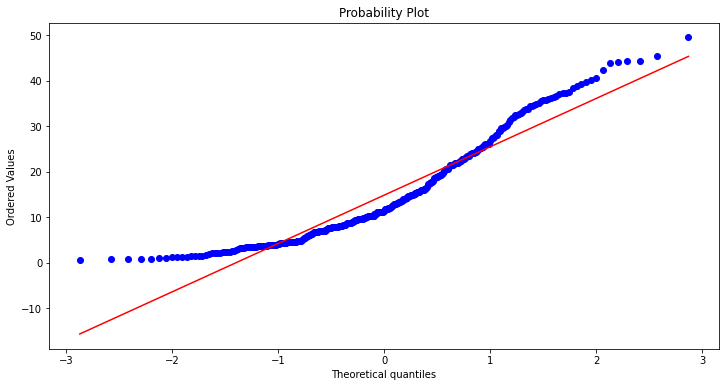

In [30]:
plt.figure(figsize=(12,6))
stats.probplot(city_Yangon['gross income'],plot=plt,dist='norm')
plt.show()

<AxesSubplot:xlabel='Product line', ylabel='count'>

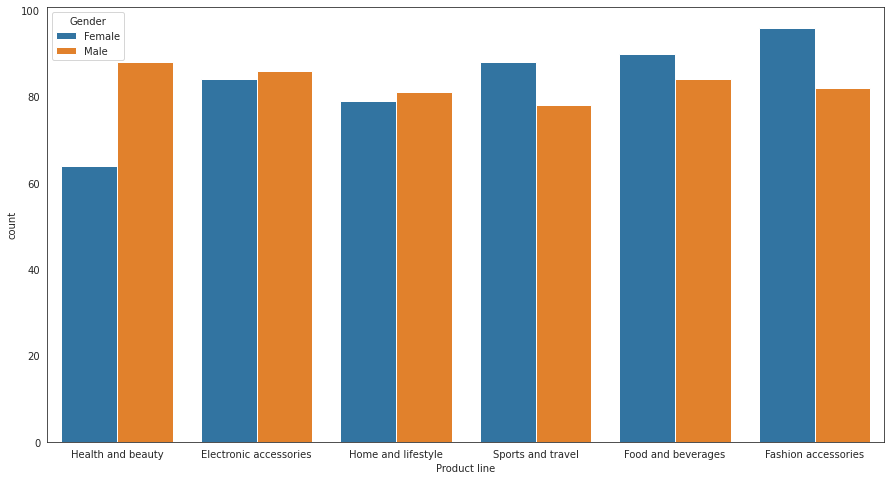

In [42]:
plt.figure(figsize=(15,8))
sns.set_style("white")
sns.countplot(x='Product line',hue='Gender',data=df,palette='tab10')

In [47]:
pd.DataFrame(df['Product line'].value_counts())

,Product line
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


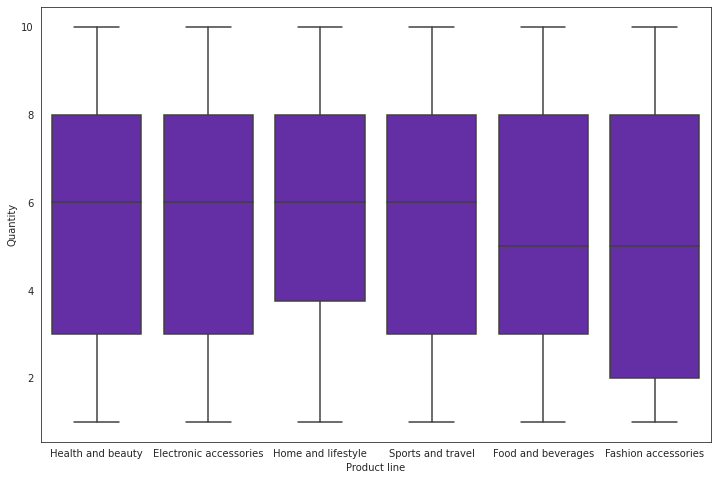

In [51]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Product line', y='Quantity', data=df, color='#631ab8')
plt.show()

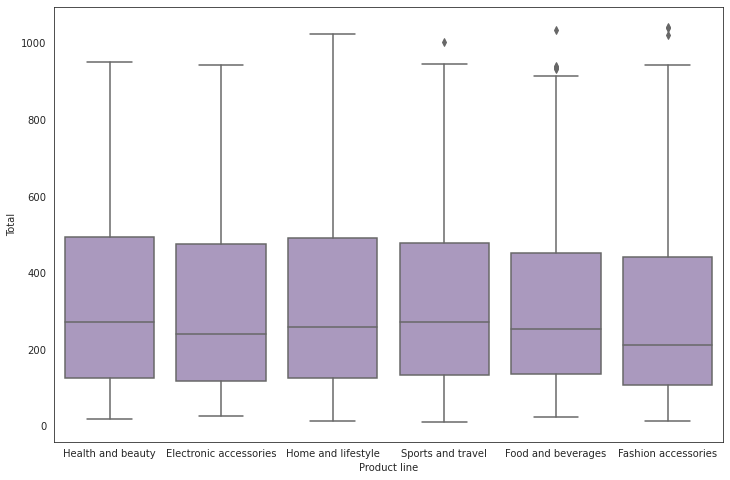

In [52]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Product line', y='Total', data=df, color='#aa93c4')
plt.show()

In [60]:
df['Tax 5%'].corr(df['gross income'])

1.0

([<matplotlib.axis.XTick at 0x7fed7a790370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

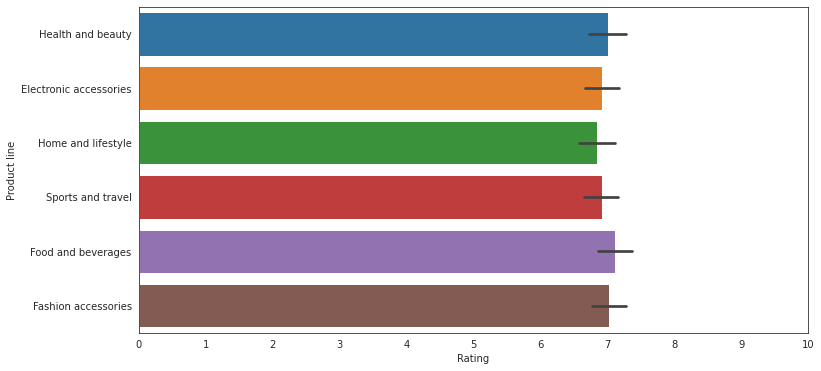

In [61]:
xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(y = df['Product line'], x = df['Rating'])
plt.xticks(xdata)

In [62]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


here we can see Tax 5% is positively correlated with Total, cogs and gross income <br>
Total is positively related to cogs and gross income <br>

In [82]:
df['Gender']=='Female'

0       True
1       True
2      False
3      False
4      False
       ...  
995    False
996     True
997    False
998    False
999     True
Name: Gender, Length: 1000, dtype: bool

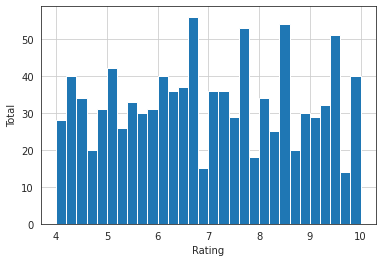

In [78]:
df['Rating'].hist(bins=30)
plt.xlabel('Rating')
plt.ylabel("Total")

plt.show()

<AxesSubplot:xlabel='Product line', ylabel='Rating'>

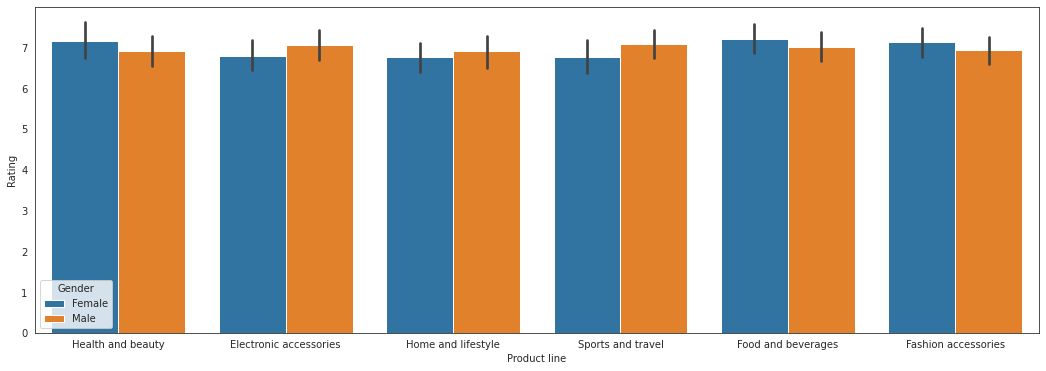

In [95]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Product line', y = 'Rating',hue='Gender', data = df)